# Install Ludwig toolbox and it's dependencies

In [0]:
!git clone https://github.com/uber/ludwig.git
%cd ludwig
!pip install -r requirements.txt
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0
!python setup.py install

Cloning into 'ludwig'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 4901 (delta 97), reused 64 (delta 41), pack-reused 4762
Receiving objects: 100% (4901/4901), 8.67 MiB | 6.60 MiB/s, done.
Resolving deltas: 100% (3375/3375), done.
/content/ludwig
     |████████████████████████████████| 25.3MB 25kB/s 
     |████████████████████████████████| 163kB 69.1MB/s 
     |████████████████████████████████| 5.0MB 63.3MB/s 
     |████████████████████████████████| 51kB 30.8MB/s 
     |████████████████████████████████| 61kB 34.0MB/s 
     |████████████████████████████████| 71kB 35.3MB/s 
     |████████████████████████████████| 112kB 72.7MB/s 
     |████████████████████████████████| 3.5MB 50.9MB/s 
  Created wheel for uvicorn: filename=uvicorn-0.8.6-cp36-none-any.whl size=37027 sha256=a2d8ed54c33776eed6fe5ff5721fdee2b7dd64ab9f6933e08630fe1fab7b82cc
  Stored in directory: /root/.cache/pip/wheels/

# Upload and unzip datasets and yaml files

In [0]:
%cd /content
!unzip data.zip
!mkdir results

/content
Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: data/yamls/
  inflating: data/yamls/.DS_Store    
  inflating: data/yamls/binary_classification_model_definition.yaml  
   creating: data/datasets/
  inflating: data/datasets/nba.csv   
  inflating: data/datasets/nba_predict.csv  
  inflating: data/datasets/iris.csv  
  inflating: data/yamls/multiclass_classification_model_definition.yaml  
  inflating: data/datasets/iris_predict.csv  
  inflating: data/yamls/regression_model_definition.yaml  
  inflating: data/datasets/.DS_Store  
  inflating: data/datasets/auto-mpg.csv  
  inflating: data/yamls/text_classification_model_definition_1.yaml  
  inflating: data/yamls/text_classification_model_definition.yaml  
  inflating: data/datasets/reuters-allcats.csv  
  inflating: data/yamls/image_classification_model_definition.yaml  
   creating: data/datasets/mnist/
  inflating: data/datasets/mnist/.DS_Store  
   creating: data/datasets/mnist/train

# Helper functions

In [0]:
import pandas
from IPython.display import Image, display

def csv_head(f, n=10):
  df = pandas.read_csv(f)
  return df.head(n=n)

def display_image(f):
  display(Image(f))

# Binary classification

Source: https://data.world/exercises/logistic-regression-exercise-1/workspace/file?filename=nba_logreg.csv

In [0]:
csv_head('/content/data/datasets/nba/csv')

Name  GP   MIN  PTS  FGM  ...  AST  STL  BLK  TOV  TARGET_5Yrs
0   Brandon Ingram  36  27.4  7.4  2.6  ...  1.9  0.4  0.4  1.3          0.0
1  Andrew Harrison  35  26.9  7.2  2.0  ...  3.7  1.1  0.5  1.6          0.0
2   JaKarr Sampson  74  15.3  5.2  2.0  ...  1.0  0.5  0.3  1.0          0.0
3      Malik Sealy  58  11.6  5.7  2.3  ...  0.8  0.6  0.1  1.0          1.0
4      Matt Geiger  48  11.5  4.5  1.6  ...  0.3  0.3  0.4  0.8          1.0
5     Tony Bennett  75  11.4  3.7  1.5  ...  1.8  0.4  0.0  0.7          0.0
6      Don MacLean  62  10.9  6.6  2.5  ...  0.6  0.2  0.1  0.7          1.0
7     Tracy Murray  48  10.3  5.7  2.3  ...  0.2  0.2  0.1  0.7          1.0
8     Duane Cooper  65   9.9  2.4  1.0  ...  2.3  0.3  0.0  1.1          0.0
9     Dave Johnson  42   8.5  3.7  1.4  ...  0.3  0.2  0.0  0.7          0.0

[10 rows x 21 columns]

### Training model

In [0]:
!ludwig train \
--data_csv data/datasets/nba.csv \
--model_definition_file data/yamls/binary_classification_model_definition.yaml \
--output_directory results/binary_classification \
--experiment_name binary_classification \
--model_name nba_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Train

Experiment name: binary_classification
Model name: nba_model
Output path: results/binary_classification/binary_classification_nba_model_2


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig train --data_csv data/datasets/nba.csv '
 '--model_definition_file '
 'data/yamls/binary_classification_model_definition.yaml --output_directory '
 'results/binary_classification --experiment_name binary_classification '
 '--model_name nba_model --gpus

### Visualizing training results



In [0]:
!ludwig visualize \
--visualization learning_curves \
--training_statistics results/binary_classification/binary_classification_nba_model_0/training_statistics.json \
--output_directory results/binary_classification/visualizations \
--file_format png

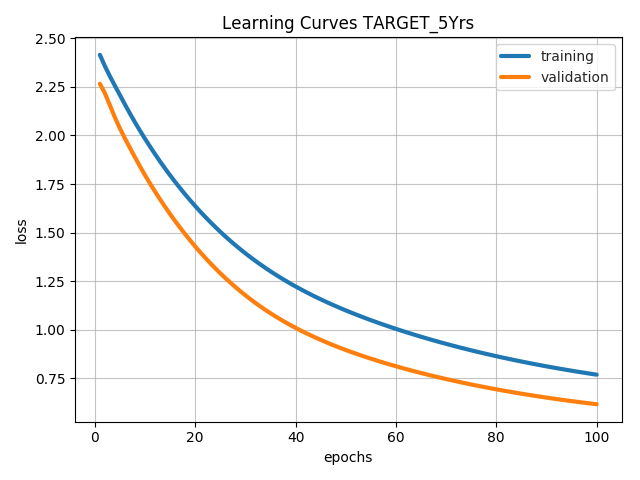

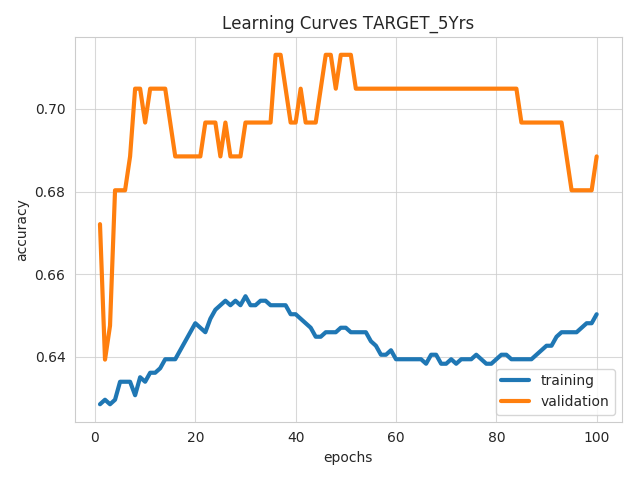

In [0]:
display_image('/content/results/binary_classification/visualizations/learning_curves_TARGET_5Yrs_loss.png')
display_image('/content/results/binary_classification/visualizations/learning_curves_TARGET_5Yrs_accuracy.png')

### Testing trained model

In [0]:
!ludwig test \
--data_csv data/datasets/nba_predict.csv \
--model_path results/binary_classification/binary_classification_nba_model_0/model \
--output_directory results/binary_classification/test \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Test

Dataset path: data/datasets/nba_predict.csv
Model path: results/binary_classification/binary_classification_nba_model_0/model
Output path: results/binary_classification/test_0

Loading metadata from: results/binary_classification/binary_classification_nba_model_0/model/train_set_metadata.json

╒═══════════════╕
│ LOADING MODEL │
╘═══════════════╛




Instructions for updating:
Call initializer instance with the dtype argument instead of passing

### Visualizing testing results

In [0]:
!ludwig visualize \
--visualization roc_curves_from_test_statistics \
--field TARGET_5Yrs \
--test_statistics results/binary_classification/test/test_statistics.json \
--output_directory results/binary_classification/visualizations \
--file_format png

No handles with labels found to put in legend.


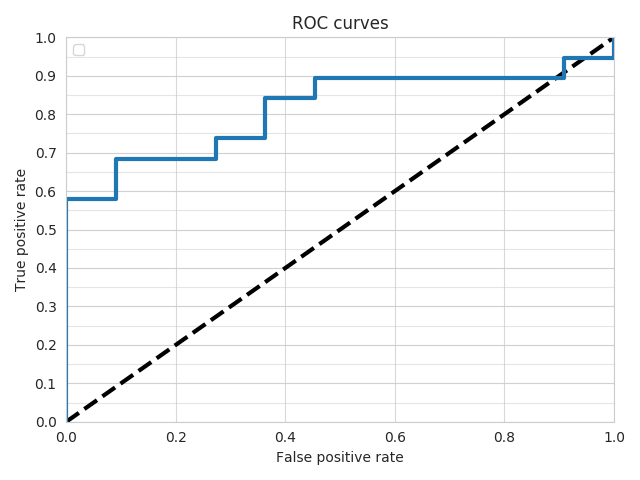

In [0]:
display_image('/content/results/binary_classification/visualizations/roc_curves_from_prediction_statistics.png')

In [0]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/binary_classification/test/test_statistics.json \
--ground_truth_metadata data/datasets/nba.json \
--output_directory results/binary_classification/visualizations \
--file_format png

Traceback (most recent call last):
  File "/usr/local/bin/ludwig", line 11, in <module>
    load_entry_point('ludwig==0.2.1', 'console_scripts', 'ludwig')()
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/cli.py", line 108, in main
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/cli.py", line 64, in __init__
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/cli.py", line 94, in visualize
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/visualize.py", line 3129, in cli
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/visualize.py", line 649, in confusion_matrix_cli
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/visualize.py", line 84, in load_data_for_viz
  File "/usr/local/lib/python3.6/dist-packages/ludwig-0.2.1-py3.6.egg/ludwig/visualize.py", line 83, in <listcomp>
  File "/usr/local/lib/python3.6/dist-packages/ludw

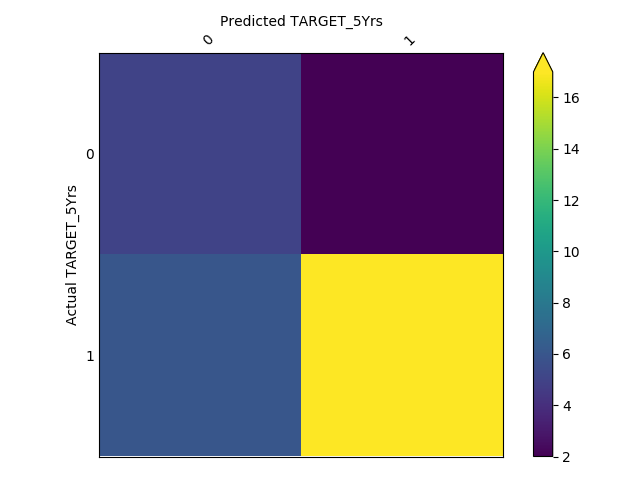

In [0]:
display_image('/content/results/binary_classification/visualizations/confusion_matrix__TARGET_5Yrs_top2.png')

### Using trained model to predict new data

In [0]:
!ludwig predict \
--data_csv data/datasets/nba_predict.csv \
--model_path results/binary_classification/binary_classification_nba_model_0/model \
--output_directory results/binary_classification/predict \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Predict

Dataset path: data/datasets/nba_predict.csv
Model path: results/binary_classification/binary_classification_nba_model_0/model
Output path: results/binary_classification/predict

Loading metadata from: results/binary_classification/binary_classification_nba_model_0/model/train_set_metadata.json

╒═══════════════╕
│ LOADING MODEL │
╘═══════════════╛




Instructions for updating:
Call initializer instance with the dtype argument instead of pas

# Multiclass classification

Source: https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv

In [0]:
csv_head('/content/data/datasets/iris.csv')

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

### Training model

In [0]:
!ludwig train \
--data_csv data/datasets/iris.csv \
--model_definition_file data/yamls/multiclass_classification_model_definition.yaml \
--output_directory results/multiclass_classification \
--experiment_name multiclass_classification \
--model_name iris_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Train

Experiment name: multiclass_classification
Model name: iris_model
Output path: results/multiclass_classification/multiclass_classification_iris_model_3


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig train --data_csv data/datasets/iris.csv '
 '--model_definition_file '
 'data/yamls/multiclass_classification_model_definition.yaml '
 '--output_directory results/multiclass_classification --experiment_name '
 'multiclass_classification --

### Visualizing training results

In [0]:
!ludwig visualize \
--visualization learning_curves \
--training_statistics results/multiclass_classification/multiclass_classification_iris_model_0/training_statistics.json \
--output_directory results/multiclass_classification/visualizations \
--file_format png

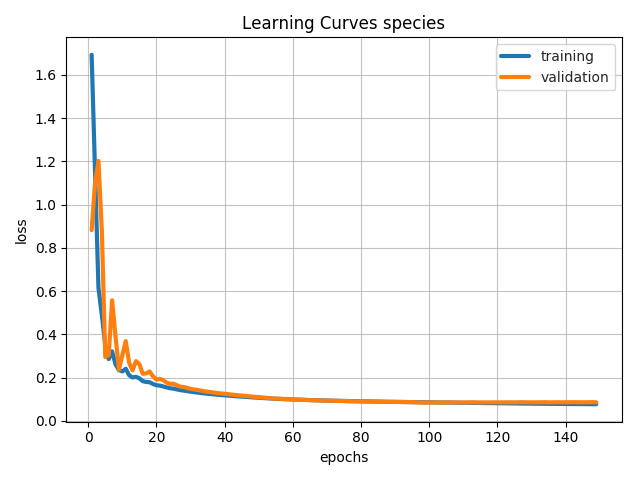

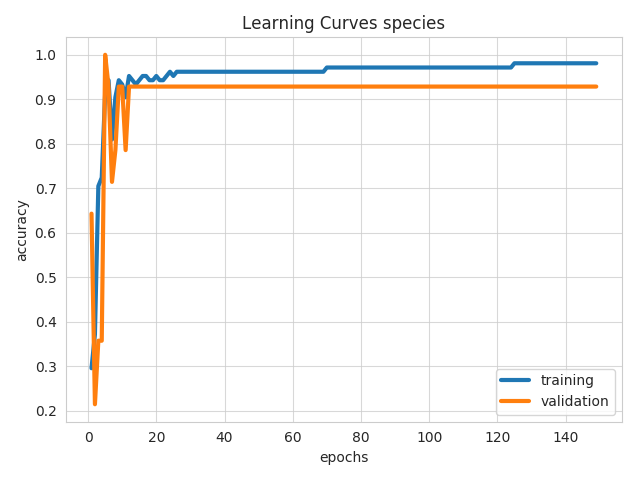

In [0]:
display_image('/content/results/multiclass_classification/visualizations/learning_curves_species_loss.png')
display_image('/content/results/multiclass_classification/visualizations/learning_curves_species_accuracy.png')

### Testing trained model

In [0]:
!ludwig test \
--data_csv data/datasets/iris_predict.csv \
--model_path results/multiclass_classification/multiclass_classification_iris_model_0/model \
--output_directory results/multiclass_classification/test \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Test

Dataset path: data/datasets/iris_predict.csv
Model path: results/multiclass_classification/multiclass_classification_iris_model_3/model
Output path: results/multiclass_classification/test_0

Loading metadata from: results/multiclass_classification/multiclass_classification_iris_model_3/model/train_set_metadata.json

╒═══════════════╕
│ LOADING MODEL │
╘═══════════════╛



Instructions for updating:
Call initializer instance with the dtype argum

### Visualizing testing results

In [0]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/multiclass_classification/test/test_statistics.json \
--ground_truth_metadata data/datasets/iris.json \
--output_directory results/multiclass_classification/visualizations \
--file_format png

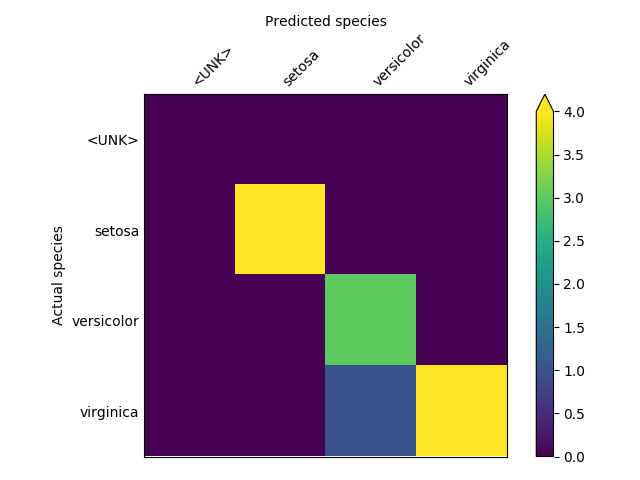

In [0]:
display_image('/content/results/multiclass_classification/visualizations/confusion_matrix__species_top4.png')

In [0]:
!ludwig visualize \
--visualization compare_classifiers_multiclass_multimetric \
--test_statistics results/multiclass_classification/test/test_statistics.json \
--field  species \
--model_names multiclass_model \
--ground_truth_metadata data/datasets/iris.json \
--output_directory results/multiclass_classification/visualizations \
--file_format png

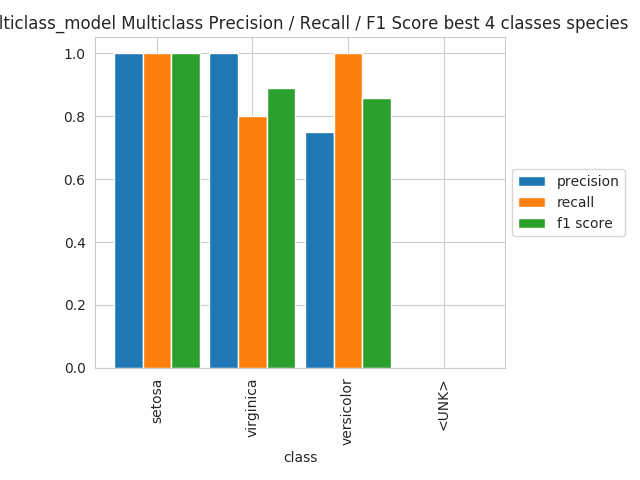

In [0]:
display_image('/content/results/multiclass_classification/visualizations/compare_classifiers_multiclass_multimetric_multiclass_model_species_best4.png')

# Regression

Source:
https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [0]:
csv_head('/content/data/datasets/auto-mpg.csv')

MPG  Cylinders  Displacement  ...  Acceleration  ModelYear  Origin
0  18.0          8         307.0  ...          12.0         70       1
1  15.0          8         350.0  ...          11.5         70       1
2  18.0          8         318.0  ...          11.0         70       1
3  16.0          8         304.0  ...          12.0         70       1
4  17.0          8         302.0  ...          10.5         70       1
5  15.0          8         429.0  ...          10.0         70       1
6  14.0          8         454.0  ...           9.0         70       1
7  14.0          8         440.0  ...           8.5         70       1
8  14.0          8         455.0  ...          10.0         70       1
9  15.0          8         390.0  ...           8.5         70       1

[10 rows x 8 columns]

### Performing the experiment

In [0]:
!ludwig experiment \
--data_csv data/datasets/auto-mpg.csv \
--model_definition_file data/yamls/regression_model_definition.yaml \
--output_directory results/regression \
--experiment_name regression \
--model_name auto_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Experiment

Experiment name: regression
Model name: auto_model
Output path: results/regression/regression_auto_model_0


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig experiment --data_csv data/datasets/auto-mpg.csv '
 '--model_definition_file data/yamls/regression_model_definition.yaml '
 '--output_directory results/regression --experiment_name regression '
 '--model_name auto_model --gpus 0')
random_seed: 42
input_data: 'data/datasets/auto

# Text classification

Source: http://archive.ics.uci.edu/ml/datasets/Reuters-21578+Text+Categorization+Collection

In [0]:
csv_head('/content/data/datasets/reuters-allcats.csv')

class                                               text
0         Neg-  2 BAHIA COCOA REVIEW     SALVADOR  Feb 26 - Sh...
1         Neg-  2 USX ltX DEBT DOWGRADED BY MOODYS     NEW YOR...
2     Pos-earn  2 COBANCO INC ltCBCO YEAR NET     SANTA CRUZ  ...
3     Pos-earn  2 BROWN-FORMAN INC ltBFD 4TH QTR NET     LOUIS...
4         Neg-  2 HUGHES CAPITAL UNIT SIGNS PACT WITH BEAR STE...
5     Pos-earn  2 ESQUIRE RADIO AND ELECTRONICS INC ltEE 4TH Q...
6  Pos-housing  2 JANUARY HOUSING SALES DROP  REALTY GROUP SAY...
7     Pos-earn  2 OWENS AND MINOR INC ltOBOD RAISES QTLY DIVID...
8     Pos-earn  2 STANDARD TRUSTCO SEES BETTER YEAR     Toront...
9      Pos-acq  2 MCLEANS ltMII US LINES SETS ASSET TRANSFER  ...

### Performing the experiments

In [0]:
!ludwig experiment \
--data_csv data/datasets/reuters-allcats.csv \
--model_definition_file data/yamls/text_classification_model_definition.yaml \
--output_directory results/text_classification \
--experiment_name text_classification \
--model_name reuters_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Experiment

Experiment name: text_classification
Model name: reuters_model
Output path: results/text_classification/text_classification_reuters_model_0


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig experiment --data_csv '
 'data/datasets/reuters-allcats.csv --model_definition_file '
 'data/yamls/text_classification_model_definition.yaml --output_directory '
 'results/text_classification --experiment_name text_classification '
 '--model_nam

In [0]:
!ludwig experiment \
--data_csv data/datasets/reuters-allcats.csv \
--model_definition_file data/yamls/text_classification_model_definition_1.yaml \
--output_directory results/text_classification \
--experiment_name text_classification_1 \
--model_name reuters_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Experiment

Experiment name: text_classification_1
Model name: reuters_model
Output path: results/text_classification/text_classification_1_reuters_model_0


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig experiment --data_csv '
 'data/datasets/reuters-allcats.csv --model_definition_file '
 'data/yamls/text_classification_model_definition_1.yaml --output_directory '
 'results/text_classification --experiment_name text_classification_1 '
 '--m

### Comparing the models

#### Confusion matrix

In [0]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/text_classification/text_classification_reuters_model_0/test_statistics.json \
--ground_truth_metadata data/datasets/reuters-allcats.json \
--output_directory results/text_classification/visualizations \
--file_format png

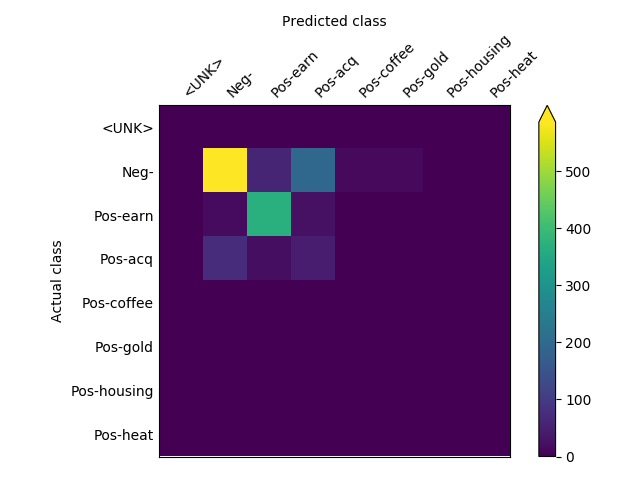

In [0]:
display_image('/content/results/text_classification/visualizations/confusion_matrix__class_top8.png')

In [0]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/text_classification/text_classification_1_reuters_model_0/test_statistics.json \
--ground_truth_metadata data/datasets/reuters-allcats.json \
--output_directory results/text_classification/visualizations \
--file_format png

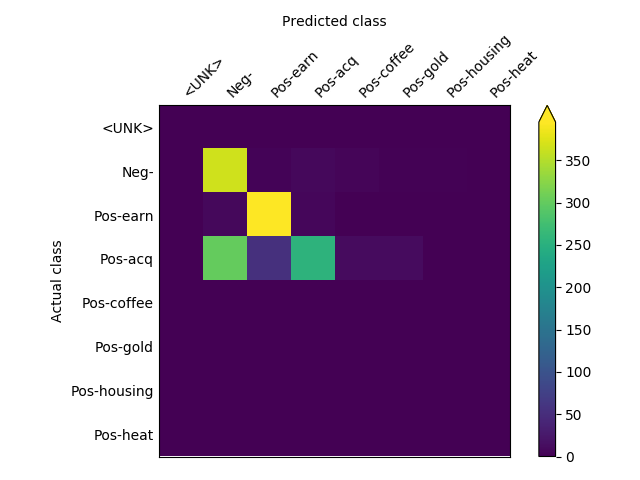

In [0]:
display_image('/content/results/text_classification/visualizations/confusion_matrix__class_top8.png')

#### Performance of the models

In [0]:
!ludwig visualize \
--visualization compare_classifiers_performance_from_pred \
--ground_truth data/datasets/reuters-allcats.hdf5 \
--ground_truth_metadata data/datasets/reuters-allcats.json \
--field class \
--predictions results/text_classification/text_classification_reuters_model_0/class_predictions.csv results/text_classification/text_classification_1_reuters_model_0/class_predictions.csv \
--model_names model model_1 \
--output_directory results/text_classification/visualizations \
--file_format png

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


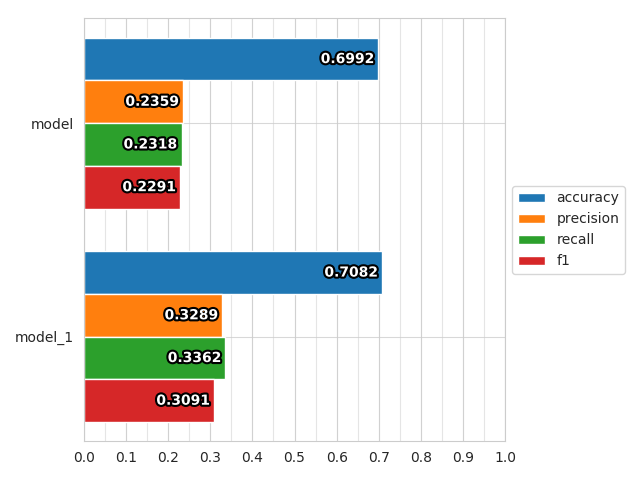

In [0]:
display_image('/content/results/text_classification/visualizations/compare_classifiers_performance_from_pred.png')

# Image classification

Source: https://github.com/myleott/mnist_png

In [0]:
csv_head('/content/data/datasets/mnist/mnist_dataset.csv')

image_path  label
0  training/0/16585.png      0
1  training/0/24537.png      0
2  training/0/25629.png      0
3  training/0/20751.png      0
4  training/0/34730.png      0
5  training/0/15926.png      0
6  training/0/22152.png      0
7  training/0/35348.png      0
8  training/0/22634.png      0
9   training/0/6819.png      0

### Performing the experiment

In [0]:
!ludwig experiment \
--data_csv data/datasets/mnist/mnist_dataset.csv \
--model_definition_file data/yamls/image_classification_model_definition.yaml \
--output_directory results/image_classification \
--experiment_name image_classification \
--model_name mnist_model \
--gpus 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2 - Experiment

Experiment name: image_classification
Model name: mnist_model
Output path: results/image_classification/image_classification_mnist_model_0


ludwig_version: '0.2'
command: ('/usr/local/bin/ludwig experiment --data_csv '
 'data/datasets/mnist/mnist_dataset.csv --model_definition_file '
 'data/yamls/image_classification_model_definition.yaml --output_directory '
 'results/image_classification --experiment_name image_classification '
 '--mod

### Visualizing results

In [0]:
!ludwig visualize \
--visualization confusion_matrix \
--test_statistics results/image_classification/image_classification_mnist_model_0/test_statistics.json \
--ground_truth_metadata data/datasets/mnist/mnist_dataset.json \
--output_directory results/image_classification/visualizations \
--file_format png

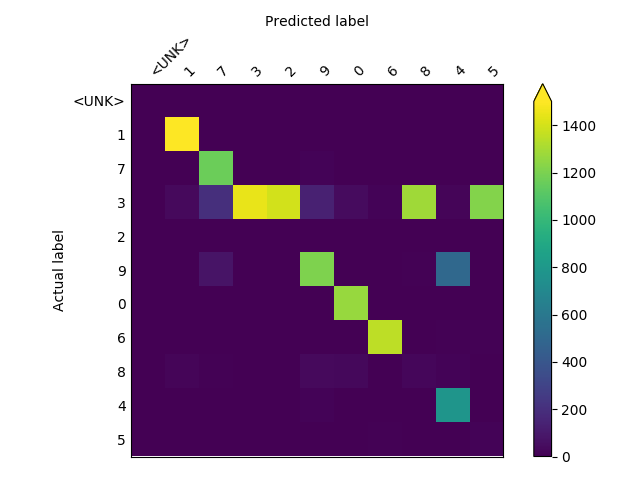

In [0]:
display_image('/content/results/image_classification/visualizations/confusion_matrix__label_top11.png')

In [0]:
!ludwig visualize \
--visualization compare_classifiers_performance_from_pred \
--ground_truth data/datasets/mnist/mnist_dataset.hdf5 \
--ground_truth_metadata data/datasets/mnist/mnist_dataset.json \
--field label \
--predictions results/image_classification/image_classification_mnist_model_0/label_predictions.csv \
--model_names model \
--output_directory results/image_classification/visualizations \
--file_format png

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


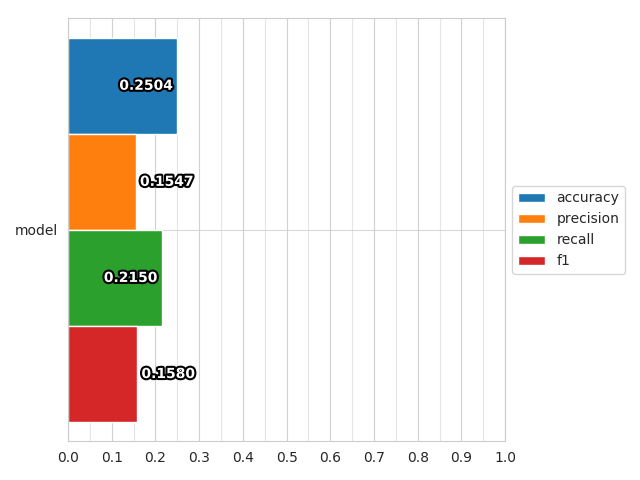

In [0]:
display_image('/content/results/image_classification/visualizations/compare_classifiers_performance_from_pred.png')

# Serving model

In [0]:
!ludwig serve \
--model_path results/image_classification/image_classification_mnist_model_0/model \
--port 8000 \
--host 0.0.0.0

email-validator not installed, email fields will be treated as str.
To install, run: pip install email-validator
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use keras.layers.dropout instead.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO: Started server process [7292]
INFO: Waiting for application startup.
INFO: Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO: Shutting down
INFO: Waiting for application shutdown.
INFO: Finished server process [7292]


```
!curl http://127.0.0.1:8000/predict -X POST -F 'image_path=/content/data/datasets/mnist/testing/0/101.png'
```